<a href="https://colab.research.google.com/github/angel127127/f1Pitstops/blob/main/fastf1Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.
google-adk 1.14.1 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.


events      WARNING 	Correcting user input 'Silverstone' to '70th Anniversary Grand Prix'
core           INFO 	Loading data for 70th Anniversary Grand Prix - Qualifying [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for 70th Anniversary Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
c

Q3 Qualifiers:  77    BOT
44    HAM
27    HUL
33    VER
3     RIC
18    STR
10    GAS
16    LEC
23    ALB
4     NOR
Name: Abbreviation, dtype: object


/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/usr/local/lib/python3.12/dist-packages/fastf1/core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


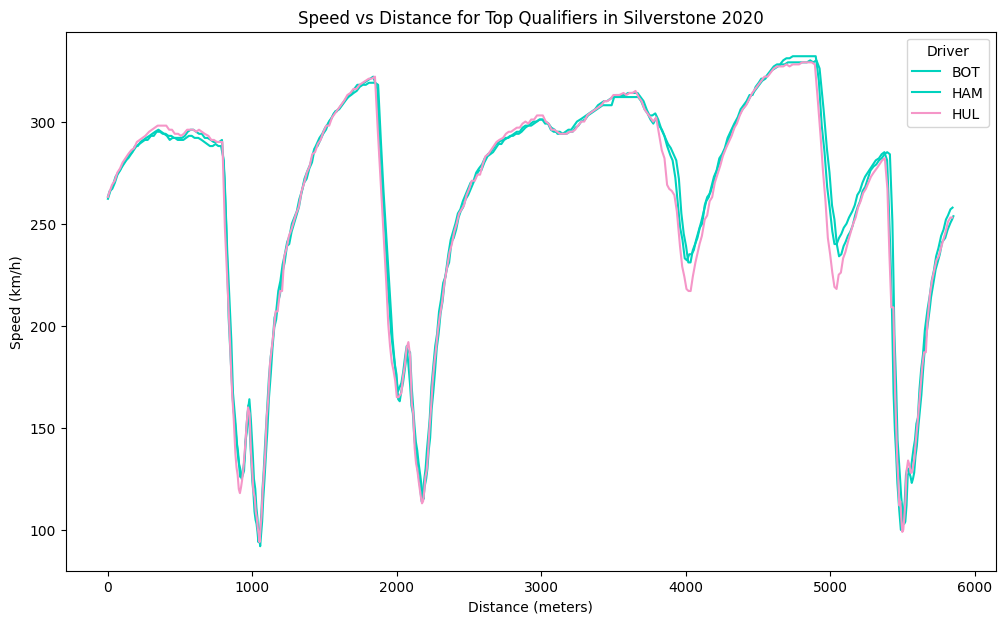

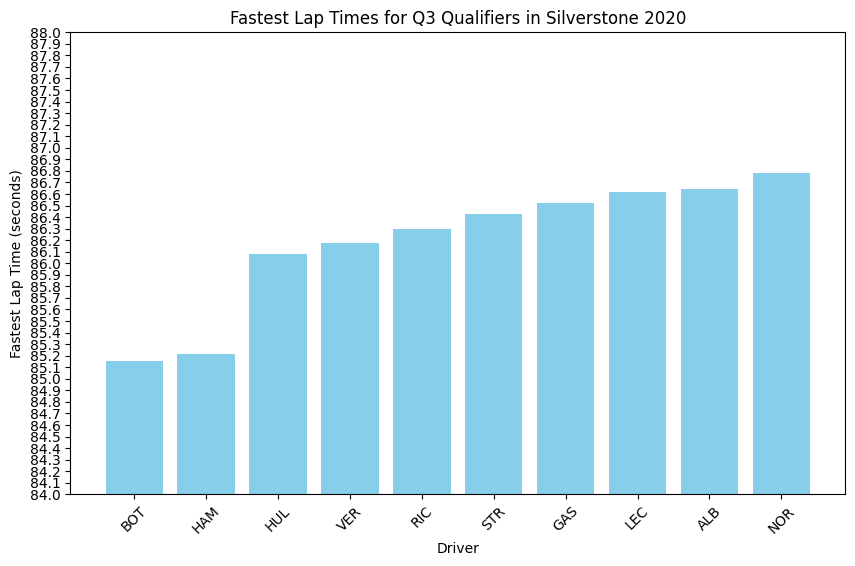

In [25]:
import fastf1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

# Create the cache directory if it doesn't exist
cache_dir = 'cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

fastf1.Cache.enable_cache(cache_dir)
session = fastf1.get_session(2020, 'Silverstone', 'Q')
session.load()

results = session.results
q3_qualifiers = results[:10]
top3_qual = results[:3]
q3_drivers = q3_qualifiers['Abbreviation']
top3_drivers = top3_qual['Abbreviation']

print("Q3 Qualifiers: ", q3_drivers)

fastest_lap = []
telemetry_data = {}
for driver in q3_drivers:
    driver_data = session.laps.pick_driver(driver)
    fastest_lap_data = driver_data.pick_fastest()
    fastest_lap.append({'Driver': driver, 'Fastest Lap (secs)': fastest_lap_data['LapTime'].total_seconds()})

for driver in top3_drivers:
    driver_data = session.laps.pick_driver(driver)
    fastest_lap_data = driver_data.pick_fastest()
    telemetry = fastest_lap_data.get_telemetry()
    telemetry = telemetry.add_distance()
    telemetry_data[driver] = telemetry

df = pd.DataFrame(fastest_lap)

plotting.setup_mpl() # Setup plotting

plt.figure(figsize=(12, 7))

plt.title('Speed vs Distance for Top Qualifiers in Silverstone 2020')
plt.xlabel('Distance (meters)')
plt.ylabel('Speed (km/h)')

for driver in top3_drivers:
    telemetry = telemetry_data[driver]
    colour = '#' + session.get_driver(driver).TeamColor # Prepend '#' to the team color
    plt.plot(telemetry['Distance'], telemetry['Speed'], color=colour, label=driver)

plt.legend(title='Driver')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(df['Driver'], df['Fastest Lap (secs)'], color='skyblue')
plt.xlabel('Driver')
plt.ylabel('Fastest Lap Time (seconds)')
plt.title('Fastest Lap Times for Q3 Qualifiers in Silverstone 2020')
plt.xticks(rotation=45)
plt.ylim(84, 88)
plt.yticks(np.arange(84, 88.1, 0.1)) # Set y-axis ticks at 0.1 second intervals
plt.show()